# Natural Langeage Processing

## Import dataset

In [105]:
# Start by using the 20k dataset
data_dir = "pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [106]:
import zipfile

def unzip_data(filename):
    zip_ref = zipfile.ZipFile(filename, "r")
    zip_ref.extractall()
    zip_ref.close()

In [107]:
unzip_data("pubmed-rct-master.zip")

In [108]:
# Now, let's see what is inside the dataset
import os

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [109]:
walk_through_dir("pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/")

There are 0 directories and 3 images in 'pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign/'.


In [110]:
# Create function to read the lines of a document
def get_lines(filename):
    with open(filename, "r") as f:
        return f.readlines()

In [111]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

## Preprocess Data

In [112]:
# Now, we need to preprocess the data
def preprocess_data(filename):
    input_lines = get_lines(filename)
#     Create an empty abstract
    abstract_lines = ''
#     Create an empty list of abstracts
    abstract_sample = []
    
    for line in input_lines:
#         If line starts with ### then it is start of new abstract
        if line.startswith('###'):
            abstract_id = line
            abstract_lines = ''
#         If line is a new line then it is end of abstract
#         Now, start to process the data
        elif line.isspace():
            abstract_line_split = abstract_lines.splitlines()
            
            for abstract_line_number , abstract_line in enumerate(abstract_line_split):
                line_data = {}
#                 To get the heading of line split it with respect to \t
                target_text_split = abstract_line.split('\t')
                line_data['target'] = target_text_split[0]
#                Lower the data in text
                line_data['text'] = target_text_split[1].lower()
                line_data['line_number'] = abstract_line_number + 1
                line_data['total_lines'] = len(abstract_line_split)
                abstract_sample.append(line_data)
                
            
#         Now if this is none og the above that means it is line in one abstract
#         So , add number of lines in abstract
        else:
            abstract_lines += line
            
    return abstract_sample

In [113]:
train_data = preprocess_data(data_dir + 'train.txt')
val_data = preprocess_data(data_dir + 'dev.txt')
test_data = preprocess_data(data_dir + 'test.txt')

len(train_data) , len(test_data) , len(val_data)

(180040, 30135, 30212)

In [114]:
train_data[:12]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 1,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 2,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 3,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 4,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

## Visualise Data

In [115]:
# Now, convert data into pandas dataframe
import pandas as pd
train_frame = pd.DataFrame(train_data)
val_frame = pd.DataFrame(val_data)
test_frame = pd.DataFrame(test_data)
train_frame.head(12)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,1,12
1,METHODS,a total of @ patients with primary knee oa wer...,2,12
2,METHODS,outcome measures included pain reduction and i...,3,12
3,METHODS,pain was assessed using the visual analog pain...,4,12
4,METHODS,secondary outcome measures included the wester...,5,12
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",6,12
6,RESULTS,there was a clinically relevant reduction in t...,7,12
7,RESULTS,the mean difference between treatment arms ( @...,8,12
8,RESULTS,"further , there was a clinically relevant redu...",9,12
9,RESULTS,these differences remained significant at @ we...,10,12


In [116]:
train_frame['target'].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<AxesSubplot:ylabel='Frequency'>

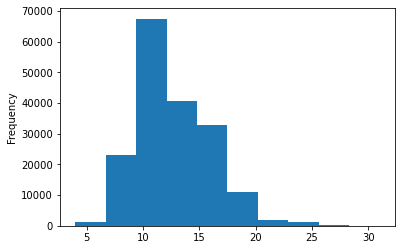

In [117]:
train_frame['total_lines'].plot.hist()

In [118]:
# Seprating text data as it is our parameter
train_sentence = train_frame['text'].tolist()
val_sentence = val_frame['text'].tolist()
test_sentence = test_frame['text'].tolist()
len(train_sentence) , len(val_sentence) , len(test_sentence)

(180040, 30212, 30135)

In [119]:
train_sentence[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [122]:
# Now , OneHotCode target in numericals
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)

train_label_onehot = encoder.fit_transform(train_frame['target'].to_numpy().reshape(-1 , 1))
val_label_onehot = encoder.fit_transform(val_frame['target'].to_numpy().reshape(-1 , 1))
test_label_onehot = encoder.fit_transform(test_frame['target'].to_numpy().reshape(-1 , 1))

train_label_onehot[:12]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [124]:
# As we know, In this case labelencoder performs well so we are going to use it as labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

train_label = encoder.fit_transform(train_frame['target'].to_numpy())
val_label = encoder.fit_transform(val_frame['target'].to_numpy())
test_label = encoder.fit_transform(test_frame['target'].to_numpy())

train_label[:12]

array([3, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 1])

In [125]:
num_classes = len(encoder.classes_)
class_names = encoder.classes_

print(f'Number of classes are {num_classes} which are named as {class_names}')

Number of classes are 5 which are named as ['BACKGROUND' 'CONCLUSIONS' 'METHODS' 'OBJECTIVE' 'RESULTS']


Now our data is ready to go

## Model - 0(Baseline)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('Tf-idf' , TfidfVectorizer()) , 
    ('NB' , MultinomialNB())
])

model_0.fit(train_sentence , train_label)

Pipeline(steps=[('Tf-idf', TfidfVectorizer()), ('NB', MultinomialNB())])

In [20]:
model_0.score(val_sentence , val_label)

0.7218323844829869

In [21]:
baseline_pred = model_0.predict(val_sentence)

In [22]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_result(y_true , y_pred):
    model_accuracy = accuracy_score(y_pred , y_true)
    
    model_precision , model_recall , model_f1 , _ = precision_recall_fscore_support(y_true , y_pred , average = 'weighted')
    model_results = {'Accuracy' : model_accuracy , 
                    'Precision' : model_precision , 
                    'Recall' : model_recall , 
                    'F1 Score' : model_f1}
    
    return model_results

In [23]:
baseline_results = calculate_result(val_label , baseline_pred)
print(baseline_results)

{'Accuracy': 0.7218323844829869, 'Precision': 0.7186466952323352, 'Recall': 0.7218323844829869, 'F1 Score': 0.6989250353450294}


Excellent! We've got a working baseline to try and improve upon.

But before we start building deeper models, we've got to create vectorization and embedding layers.

The vectorization layer will convert our text to numbers and the embedding layer will capture the relationships between those numbers.

## Text vectorization

In [24]:
import numpy as np
import tensorflow as tf

In [25]:
# Sentence length 
sent_length = [len(sentence.split()) for sentence in train_sentence]
mean_len = np.mean(sent_length)
print(mean_len)

26.338269273494777


(array([1.5999e+05, 1.8760e+04, 1.1510e+03, 9.9000e+01, 2.8000e+01,
        1.0000e+01, 2.0000e+00]),
 array([  1.        ,  43.14285714,  85.28571429, 127.42857143,
        169.57142857, 211.71428571, 253.85714286, 296.        ]),
 <BarContainer object of 7 artists>)

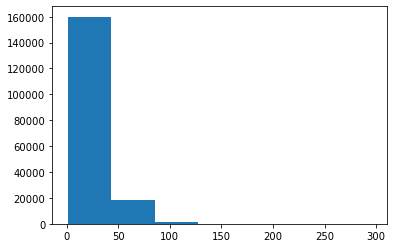

In [26]:
import matplotlib.pyplot as plt
plt.hist(sent_length , bins = 7)

In [27]:
# Length under which 55% of data lies
len_95_percent = int(np.percentile(sent_length , 95))
print(len_95_percent)

55


In [28]:
# How many words are in our vocabulary? (taken from 3.2 in https://arxiv.org/pdf/1710.06071.pdf)
max_tokens = 68000

In [29]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens = max_tokens , output_sequence_length = 55)

In [30]:
text_vectorizer.adapt(train_sentence)

In [31]:
import random
target_sentence = random.choice(train_sentence)
print(f'Text: {target_sentence}')
print(f'Length of Text: {len(target_sentence.split())}')
print(f'Vectorized Text: {text_vectorizer([target_sentence])}')

Text: both nsaids reduced urine flow rate and sodium excretion associated with dobutamine infusion and exercise but had no effect on glomerular filtration rate .
Length of Text: 24
Vectorized Text: [[  54 4150  191  943  765   78    3  764 2471   81    7 7239  525    3
   177   72   55   33   70   18 2270 2123   78    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [32]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"), 
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [33]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'vocabulary_size': 64841}

In [34]:
token_embed = tf.keras.layers.Embedding(input_dim = len(rct_20k_text_vocab) , output_dim = 128 , 
                                       mask_zero = True , name = 'token_embedding')

print(f'Sentence before vectorization: \n{target_sentence}\n')
vectorized_sentence = text_vectorizer([target_sentence])
print(f'Sentence after Vectorization: \n{vectorized_sentence}\n')
embed_sentence = token_embed(vectorized_sentence)
print(f'Sentence after Embedding: \n{embed_sentence}\n')
print(f'Sentence after shape: \n{embed_sentence.shape}')

Sentence before vectorization: 
both nsaids reduced urine flow rate and sodium excretion associated with dobutamine infusion and exercise but had no effect on glomerular filtration rate .

Sentence after Vectorization: 
[[  54 4150  191  943  765   78    3  764 2471   81    7 7239  525    3
   177   72   55   33   70   18 2270 2123   78    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]

Sentence after Embedding: 
[[[ 0.03732328 -0.04081316 -0.03000761 ...  0.00548623  0.02889374
    0.03998907]
  [-0.01392848 -0.01666921 -0.02207023 ...  0.01770854  0.04308584
    0.00811696]
  [-0.00203091 -0.02869782 -0.04433347 ...  0.03309682  0.04284379
    0.04537267]
  ...
  [-0.01853166  0.02290901  0.01278274 ... -0.01107211  0.03686712
   -0.00169795]
  [-0.01853166  0.02290901  0.01278274 ... -0.01107211  0.03686712
   -0.00169795]
  [-0.01853166  0.02290901  0.01278274 ... -0.

In [35]:
# Turn datasets into tensorflow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentence , train_label_onehot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentence , val_label_onehot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentence , test_label_onehot))

train_dataset

<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>

In [36]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

## Model - 1(Conv1D)

In [37]:
inputs = tf.keras.layers.Input(shape = (1 , ) , dtype = tf.string)
text_vectors = text_vectorizer(inputs)
token_embedding = token_embed(text_vectors)
x = tf.keras.layers.Conv1D(64 , kernel_size = 5 , padding = 'same' , activation = 'relu')(token_embedding)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(num_classes , activation = 'softmax')(x)

model_1 = tf.keras.Model(inputs , outputs)
model_1.compile(loss = 'categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

In [38]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 55)                0         
_________________________________________________________________
token_embedding (Embedding)  (None, 55, 128)           8299648   
_________________________________________________________________
conv1d (Conv1D)              (None, 55, 64)            41024     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 8,340,997
Trainable params: 8,340,997
Non-trainable params: 0
___________________________________________________

In [39]:
# Fit only 10% data & then validate on 10% of data
history_1 = model_1.fit(train_dataset , steps_per_epoch = int(0.1 * len(train_dataset)) , epochs = 3 , 
                       validation_data = valid_dataset , validation_steps = int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 81s 140ms/step - loss: 0.9167 - accuracy: 0.6361 - val_loss: 0.6850 - val_accuracy: 0.7400
Epoch 2/3
562/562 [==============================] - 79s 141ms/step - loss: 0.6537 - accuracy: 0.7590 - val_loss: 0.6272 - val_accuracy: 0.7743
Epoch 3/3
562/562 [==============================] - 80s 142ms/step - loss: 0.6148 - accuracy: 0.7756 - val_loss: 0.5967 - val_accuracy: 0.7842


In [40]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 7s 7ms/step - loss: 0.5968 - accuracy: 0.7861


[0.5967995524406433, 0.7861114740371704]

In [41]:
model_1_pred_prob = model_1.predict(valid_dataset)
model_1_pred_prob[:10]

array([[4.38078195e-01, 1.60688117e-01, 7.65758604e-02, 2.98827618e-01,
        2.58302335e-02],
       [4.75408733e-01, 2.33321533e-01, 1.27171325e-02, 2.70797759e-01,
        7.75489723e-03],
       [1.41281307e-01, 6.70855166e-03, 1.46045815e-03, 8.50519657e-01,
        3.00365373e-05],
       [1.28723223e-05, 4.37402312e-04, 9.83023584e-01, 1.07089654e-05,
        1.65154450e-02],
       [9.73150425e-04, 3.50787938e-02, 3.24612647e-01, 7.23170931e-04,
        6.38612270e-01],
       [1.89696960e-02, 2.79219821e-02, 5.49506903e-01, 8.54065921e-03,
        3.95060748e-01],
       [3.91230045e-04, 3.91186774e-03, 2.52719045e-01, 1.83607495e-04,
        7.42794275e-01],
       [2.55683642e-02, 2.63371952e-02, 6.55237734e-01, 1.16379270e-02,
        2.81218886e-01],
       [3.58449625e-13, 1.55056199e-08, 1.05045864e-07, 1.45101853e-13,
        9.99999881e-01],
       [9.28479433e-03, 7.49283552e-01, 4.13402990e-02, 2.10455637e-02,
        1.79045677e-01]], dtype=float32)

In [42]:
model_1_pred = tf.argmax(model_1_pred_prob , axis = 1)
model_1_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 4, 2, 4, 2, 4, 1], dtype=int64)>

In [43]:
model_1_results = calculate_result(val_label , model_1_pred)
print(model_1_results)

{'Accuracy': 0.7861114788825633, 'Precision': 0.7830556751148493, 'Recall': 0.7861114788825633, 'F1 Score': 0.7833191111931113}


In [44]:
def comparator_function(baseline_results , new_model_results):
    for key , value in baseline_results.items():
        print(f'Baseline {key} : {value:.2f} , New {key} : {new_model_results[key]:.2f} , Difference : {new_model_results[key] - value:.2f}')

In [45]:
comparator_function(baseline_results , model_1_results)

Baseline Accuracy : 0.72 , New Accuracy : 0.79 , Difference : 0.06
Baseline Precision : 0.72 , New Precision : 0.78 , Difference : 0.06
Baseline Recall : 0.72 , New Recall : 0.79 , Difference : 0.06
Baseline F1 Score : 0.70 , New F1 Score : 0.78 , Difference : 0.08


## Model - 2 (Using Pre-trained Embedding layer)

In [46]:
# As we have seen our model are taking a long to train model
# So, now we are just going to import pretrained models
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [47]:
print(f'Original Sentence: \n{target_sentence}\n')
embed_sentence = tf_hub_embedding_layer([target_sentence])
print(f'Sentence after Embedding: \n{embed_sentence}\n')
print(f'Sentence after shape: \n{embed_sentence.shape}')

Original Sentence: 
both nsaids reduced urine flow rate and sodium excretion associated with dobutamine infusion and exercise but had no effect on glomerular filtration rate .

Sentence after Embedding: 
[[-0.03628267 -0.03457742 -0.00594233 -0.05035309  0.03963969 -0.00560504
   0.05061338 -0.0665879   0.02417002  0.05720924  0.07615841 -0.01585705
  -0.00713304  0.02780947 -0.05933351 -0.04796997 -0.07708652  0.06083098
   0.01801686  0.05819071  0.00383059  0.04663662  0.04737812 -0.06490146
   0.05101686 -0.06265462  0.06173467  0.03610799 -0.06479242 -0.00360954
  -0.01230785  0.07781222 -0.04938849  0.04506385 -0.01358165 -0.05319095
   0.05486546 -0.04204212 -0.02631875  0.05551073  0.05491883  0.04304826
   0.02981741  0.01625711  0.06071406  0.0497753  -0.00840858  0.05412494
   0.06784321  0.02412618 -0.05540965 -0.02297566 -0.05056119  0.04101723
  -0.03570333  0.01916938  0.0032175  -0.01974642  0.06088658 -0.00353389
  -0.01639154  0.0642509   0.05436966  0.04967099  0.019

In [48]:
inputs = tf.keras.layers.Input(shape = [] , dtype = tf.string)
embedding = tf_hub_embedding_layer(inputs)
x = tf.keras.layers.Dense(128 , activation = 'relu')(embedding)
outputs = tf.keras.layers.Dense(5 , activation= 'softmax')(x)

model_2 = tf.keras.Model(inputs , outputs)

model_2.compile(loss = 'categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

In [49]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
universal_sentence_encoder ( (None, 512)               256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [50]:
history_2 = model_2.fit(train_dataset , steps_per_epoch = (0.1 * len(train_dataset)) , epochs = 3 , 
                       validation_data = valid_dataset , validation_steps = (0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 18s 21ms/step - loss: 0.9180 - accuracy: 0.6496 - val_loss: 0.8001 - val_accuracy: 0.6888
Epoch 2/3
562/562 [==============================] - 10s 18ms/step - loss: 0.7682 - accuracy: 0.7029 - val_loss: 0.7560 - val_accuracy: 0.7056
Epoch 3/3
562/562 [==============================] - 13s 23ms/step - loss: 0.7502 - accuracy: 0.7137 - val_loss: 0.7396 - val_accuracy: 0.7135


In [51]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 16s 17ms/step - loss: 0.7377 - accuracy: 0.7146


[0.7377347946166992, 0.7145836353302002]

In [52]:
model_2_pred_prob = model_2.predict(valid_dataset)
model_2_pred_prob[:10]

array([[4.28608984e-01, 3.52688730e-01, 2.94512906e-03, 2.07178965e-01,
        8.57819431e-03],
       [3.69302034e-01, 4.66648102e-01, 4.81212279e-03, 1.55633107e-01,
        3.60458437e-03],
       [2.37338632e-01, 1.33527920e-01, 1.67619493e-02, 5.76161861e-01,
        3.62096094e-02],
       [1.31664546e-02, 4.60698381e-02, 8.12298954e-01, 8.86905938e-03,
        1.19595654e-01],
       [3.39222401e-02, 2.32863769e-01, 2.87224650e-01, 1.26876310e-02,
        4.33301628e-01],
       [9.56578762e-04, 2.05316744e-03, 6.82428718e-01, 1.12844005e-04,
        3.14448714e-01],
       [1.72771048e-03, 3.04535567e-03, 7.12523997e-01, 1.05034257e-03,
        2.81652600e-01],
       [4.42187209e-03, 2.44377665e-02, 4.30697113e-01, 1.07054936e-03,
        5.39372623e-01],
       [7.48391438e-04, 6.60938304e-03, 2.42198203e-02, 1.27894164e-03,
        9.67143476e-01],
       [1.38074666e-01, 6.79246008e-01, 2.62717512e-02, 8.49169269e-02,
        7.14906305e-02]], dtype=float32)

In [53]:
model_2_pred = tf.argmax(model_2_pred_prob , axis = 1)
model_2_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 3, 2, 4, 2, 2, 4, 4, 1], dtype=int64)>

In [54]:
model_2_results = calculate_result(val_label , model_2_pred)
print(model_2_results)

{'Accuracy': 0.7145836091619224, 'Precision': 0.7151163750002621, 'Recall': 0.7145836091619224, 'F1 Score': 0.7117703122611438}


In [55]:
comparator_function(baseline_results , model_2_results)

Baseline Accuracy : 0.72 , New Accuracy : 0.71 , Difference : -0.01
Baseline Precision : 0.72 , New Precision : 0.72 , Difference : -0.00
Baseline Recall : 0.72 , New Recall : 0.71 , Difference : -0.01
Baseline F1 Score : 0.70 , New F1 Score : 0.71 , Difference : 0.01


## Model - 3 (Conv1D with Character Embedding)

In [56]:
# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

# Test splitting non-character-level sequence into characters
split_chars(target_sentence)

'b o t h   n s a i d s   r e d u c e d   u r i n e   f l o w   r a t e   a n d   s o d i u m   e x c r e t i o n   a s s o c i a t e d   w i t h   d o b u t a m i n e   i n f u s i o n   a n d   e x e r c i s e   b u t   h a d   n o   e f f e c t   o n   g l o m e r u l a r   f i l t r a t i o n   r a t e   .'

In [57]:
train_chars = [split_chars(sentence) for sentence in train_sentence]
valid_chars = [split_chars(sentence) for sentence in val_sentence]
test_chars = [split_chars(sentence) for sentence in test_sentence]

print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [58]:
chars_lens = [len(sentence) for sentence in train_sentence]
mean_char_length = np.mean(chars_lens)
print(mean_char_length)

149.3662574983337


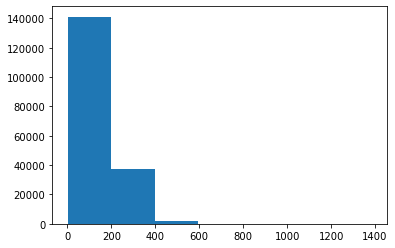

In [59]:
plt.hist(chars_lens, bins=7);

In [60]:
output_seq_char_len = int(np.percentile(chars_lens, 95))
output_seq_char_len

290

In [61]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
print(alphabet)

abcdefghijklmnopqrstuvwxyz0123456789!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [62]:
Num_char_tokens = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens=Num_char_tokens,  
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

char_vectorizer.adapt(train_chars)

In [63]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [64]:
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
p r o g r e s s i o n   t o   a d v a n c e d   a m d   w a s   a n a l y z e d   b y   g e n o t y p e   a n d   t r e a t m e n t   u s i n g   c o x   p r o p o r t i o n a t e   h a z a r d s   e s t i m a t e s   a n d   @ - y e a r   e v e n t s   .

Length of chars: 110

Vectorized chars:
[[14  8  7 18  8  2  9  9  4  7  6  3  7  5 10 21  5  6 11  2 10  5 15 10
  20  5  9  5  6  5 12 19 25  2 10 22 19 18  2  6  7  3 19 14  2  5  6 10
   3  8  2  5  3 15  2  6  3 16  9  4  6 18 11  7 24 14  8  7 14  7  8  3
   4  7  6  5  3  2 13  5 25  5  8 10  9  2  9  3  4 15  5  3  2  9  5  6
  10 19  2  5  8  2 21  2  6  3  9  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  

In [65]:
char_embed = tf.keras.layers.Embedding(input_dim=Num_char_tokens, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=True,
                              name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
p r o g r e s s i o n   t o   a d v a n c e d   a m d   w a s   a n a l y z e d   b y   g e n o t y p e   a n d   t r e a t m e n t   u s i n g   c o x   p r o p o r t i o n a t e   h a z a r d s   e s t i m a t e s   a n d   @ - y e a r   e v e n t s   .

Embedded chars (after vectorization and embedding):
[[[ 0.03747039  0.03107044  0.03118913 ...  0.01203393  0.03546928
   -0.00542027]
  [-0.02541127  0.02587204 -0.04962556 ...  0.03905273  0.03490932
    0.00014862]
  [-0.00788705  0.02950049  0.02954164 ... -0.03813249 -0.01912831
    0.03893479]
  ...
  [-0.00869967  0.04230685 -0.03730805 ...  0.04171035 -0.00617158
   -0.02959988]
  [-0.00869967  0.04230685 -0.03730805 ...  0.04171035 -0.00617158
   -0.02959988]
  [-0.00869967  0.04230685 -0.03730805 ...  0.04171035 -0.00617158
   -0.02959988]]]

Character embedding shape: (1, 290, 25)


In [66]:
inputs = tf.keras.layers.Input(shape = (1 , ) , dtype = tf.string)
char_vectors = char_vectorizer(inputs)
char_embedding = char_embed(char_vectors)
x = tf.keras.layers.Conv1D(64 , kernel_size = 5 , padding = 'same' , activation = 'relu')(char_embedding)
x = tf.keras.layers.GlobalMaxPool1D()(x)
outputs = tf.keras.layers.Dense(num_classes , activation = 'softmax')(x)

model_3 = tf.keras.Model(inputs , outputs , name = 'Model_3_Conv1D_CharEmbedding')

model_3.compile(loss = 'categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

In [67]:
model_3.summary()

Model: "Model_3_Conv1D_CharEmbedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
char_vectorizer (TextVectori (None, 290)               0         
_________________________________________________________________
char_embed (Embedding)       (None, 290, 25)           1750      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 290, 64)           8064      
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 10,139
Trainable params: 10,139
Non-trainable params: 0
__________________________________

In [68]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars , train_label_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((valid_chars , val_label_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset shapes: ((None,), (None, 5)), types: (tf.string, tf.float64)>

In [69]:
history_3 = model_3.fit(train_char_dataset , steps_per_epoch = int(0.1 * len(train_char_dataset)) , epochs = 3 ,
                       validation_data = val_char_dataset , validation_steps = int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 14s 22ms/step - loss: 1.2591 - accuracy: 0.4917 - val_loss: 1.0461 - val_accuracy: 0.5824
Epoch 2/3
562/562 [==============================] - 13s 24ms/step - loss: 1.0126 - accuracy: 0.5954 - val_loss: 0.9417 - val_accuracy: 0.6233
Epoch 3/3
562/562 [==============================] - 13s 24ms/step - loss: 0.9330 - accuracy: 0.6287 - val_loss: 0.8695 - val_accuracy: 0.6582


In [70]:
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 8s 9ms/step - loss: 0.8933 - accuracy: 0.6521


[0.893330991268158, 0.6521250009536743]

In [71]:
model_3_pred_prob = model_3.predict(val_char_dataset)
print(model_3_pred_prob[:10])

[[9.9517368e-02 2.9386184e-01 2.0932768e-01 3.3443066e-01 6.2862441e-02]
 [1.6420479e-01 2.6514044e-01 1.3974559e-01 2.4909742e-01 1.8181175e-01]
 [1.1418172e-01 2.2380735e-01 1.9008204e-01 3.8989642e-01 8.2032472e-02]
 [1.9320967e-02 3.5199091e-02 8.0655533e-01 3.4615766e-02 1.0430889e-01]
 [5.8880686e-03 1.0722188e-01 2.4304628e-01 2.1523850e-02 6.2231988e-01]
 [3.2249076e-04 4.1469670e-04 8.6087102e-01 4.5100303e-04 1.3794075e-01]
 [1.8698290e-02 2.7667997e-02 5.9997064e-01 1.5675876e-02 3.3798724e-01]
 [1.9341947e-01 3.3113623e-01 1.2250068e-01 2.8164482e-01 7.1298748e-02]
 [2.4462393e-03 8.9335227e-03 1.2347507e-01 4.5754705e-03 8.6056972e-01]
 [9.2575818e-02 4.1792536e-01 1.3326968e-01 1.5470134e-01 2.0152777e-01]]


In [72]:
model_3_pred = tf.argmax(model_3_pred_prob , axis = 1)
print(model_3_pred)

tf.Tensor([3 1 3 ... 4 4 0], shape=(30212,), dtype=int64)


In [73]:
model_3_results = calculate_result(val_label , model_3_pred)
print(model_3_results)

{'Accuracy': 0.6521249834502847, 'Precision': 0.6454674380291474, 'Recall': 0.6521249834502847, 'F1 Score': 0.6429120143125591}


## Model - 4 (Combine Pretrained token embedding + character embedding (Hybrid Embedding layer))

Dropout may be implemented on any or all hidden layers in the network as well as the visible or input layer. It is not used on the output layer. The term “dropout” refers to dropping out units (hidden and visible) in a neural network. — Dropout: A Simple Way to Prevent Neural Networks from Overfitting

In [74]:
from tensorflow.keras import layers

# Token layer
token_input = layers.Input(shape = [] , dtype = tf.string , name = 'token_input')
token_embedding = tf_hub_embedding_layer(token_input)
token_output = layers.Dense(128 , activation = 'relu')(token_embedding)
token_model = tf.keras.Model(token_input , token_output)

# Char layer
char_input = layers.Input(shape = [] , dtype = tf.string , name = 'char_input')
char_vectors = char_vectorizer(char_input)
char_embedding = char_embed(char_vectors)
char_bilstm = layers.Bidirectional(layers.LSTM(25))(char_embedding)
char_model = tf.keras.Model(char_input , char_bilstm)

# Now concate these layers
token_char_concat = layers.Concatenate(name = 'token_char_hybrid')([token_model.output , char_model.output])

combined_dropout = layers.Dropout(0.5)(token_char_concat)
x = layers.Dense(200 , activation = 'relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes , activation = 'softmax')(final_dropout)

model_4 = tf.keras.Model([token_model.input , char_model.input] , 
                        outputs , name = 'Model_4_token_and_char_embedded')

In [75]:
model_4.summary()

Model: "Model_4_token_and_char_embedded"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_input (InputLayer)         [(None,)]            0                                            
__________________________________________________________________________________________________
token_input (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           char_input[0][0]                 
__________________________________________________________________________________________________
universal_sentence_encoder (Ker (None, 512)          256797824   token_input[0][0]                
____________________________________________________________________

In [76]:
model_4.compile(loss = 'categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

### Combine token and char data into dataset before fitting model

In [77]:
# Make data
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentence , train_chars))
# Make labels
train_char_tokens_label = tf.data.Dataset.from_tensor_slices(train_label_onehot)
# Mix the data and label
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data , train_char_tokens_label))

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Make data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentence , valid_chars))
# Make labels
val_char_tokens_label = tf.data.Dataset.from_tensor_slices(val_label_onehot)
# Mix the data and label
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data , val_char_tokens_label))

val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [78]:
train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None,), (None,)), (None, 5)), types: ((tf.string, tf.string), tf.float64)>)

In [79]:
history_4 = model_4.fit(train_char_token_dataset , epochs = 3 , steps_per_epoch = int(0.1 * len(train_char_token_dataset)) , 
                       validation_data = val_char_token_dataset , validation_steps = int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 186s 297ms/step - loss: 0.9627 - accuracy: 0.6169 - val_loss: 0.7707 - val_accuracy: 0.7021
Epoch 2/3
562/562 [==============================] - 159s 283ms/step - loss: 0.7861 - accuracy: 0.6959 - val_loss: 0.7058 - val_accuracy: 0.7330
Epoch 3/3
562/562 [==============================] - 159s 284ms/step - loss: 0.7631 - accuracy: 0.7106 - val_loss: 0.6896 - val_accuracy: 0.7424


In [80]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 67s 71ms/step - loss: 0.6897 - accuracy: 0.73730s - loss: 0.6888 - accuracy


[0.6896829009056091, 0.7372898459434509]

In [81]:
model_4_pred_prob = model_4.predict(val_char_token_dataset)
model_4_pred_prob

array([[4.7654286e-01, 3.1368697e-01, 2.8495158e-03, 2.0296040e-01,
        3.9602639e-03],
       [3.5263392e-01, 4.6631518e-01, 2.7715054e-03, 1.7708966e-01,
        1.1896769e-03],
       [3.3603945e-01, 1.6079836e-01, 6.3883722e-02, 4.0036759e-01,
        3.8910784e-02],
       ...,
       [8.8841433e-04, 8.3863921e-03, 6.1407700e-02, 4.0774385e-04,
        9.2890978e-01],
       [6.0263653e-03, 6.1218698e-02, 2.4122009e-01, 2.7172465e-03,
        6.8881762e-01],
       [3.4033751e-01, 3.5014030e-01, 2.3370188e-01, 3.5509806e-02,
        4.0310510e-02]], dtype=float32)

In [82]:
model_4_pred = tf.argmax(model_4_pred_prob, axis=1)
model_4_pred

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1], dtype=int64)>

In [83]:
model_4_results = calculate_result(val_label , model_4_pred)
print(model_4_results)

{'Accuracy': 0.7372898186151198, 'Precision': 0.7373673961455989, 'Recall': 0.7372898186151198, 'F1 Score': 0.7346521050051102}


## Model - 5 (Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings)

In [84]:
train_frame.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,1,12
1,METHODS,a total of @ patients with primary knee oa wer...,2,12
2,METHODS,outcome measures included pain reduction and i...,3,12
3,METHODS,pain was assessed using the visual analog pain...,4,12
4,METHODS,secondary outcome measures included the wester...,5,12


In [85]:
train_frame['line_number'].value_counts()

1     15000
2     15000
3     15000
4     15000
5     14992
6     14949
7     14758
8     14279
9     13346
10    11981
11    10041
12     7892
13     5853
14     4152
15     2835
16     1861
17     1188
18      751
19      462
20      286
21      162
22      101
23       66
24       33
25       22
26       14
27        7
28        4
29        3
30        1
31        1
Name: line_number, dtype: int64

<AxesSubplot:ylabel='Frequency'>

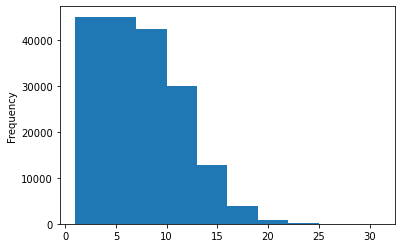

In [86]:
train_frame['line_number'].plot.hist()

In [90]:
train_line_onehot = tf.one_hot(train_frame['line_number'].to_numpy() , depth = 15)
val_line_onehot = tf.one_hot(val_frame['line_number'].to_numpy() , depth = 15)
test_line_onehot = tf.one_hot(test_frame['line_number'].to_numpy() , depth = 15)

In [92]:
train_line_onehot.shape, train_line_onehot[:20]

(TensorShape([180040, 15]),
 <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.

In [95]:
train_frame['total_lines'].value_counts(sort = False)

4        32
5       215
6      1146
7      3353
8      7464
9     12285
10    19400
11    23639
12    24468
13    22113
14    18438
15    14610
16    10768
17     7429
18     5202
19     3344
20     2480
21     1281
22      770
23      759
24      264
25      200
26      182
27       81
28       28
29       58
31       31
Name: total_lines, dtype: int64

<AxesSubplot:ylabel='Frequency'>

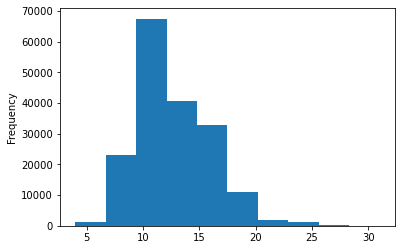

In [94]:
train_frame['total_lines'].plot.hist()

In [96]:
np.percentile(train_frame['total_lines'] , 98)

21.0

In [97]:
train_total_onehot = tf.one_hot(train_frame['total_lines'].to_numpy() , depth = 20)
val_total_onehot = tf.one_hot(val_frame['total_lines'].to_numpy() , depth = 20)
test_total_onehot = tf.one_hot(test_frame['total_lines'].to_numpy() , depth = 20)

train_total_onehot.shape , train_total_onehot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

In [100]:
# Token Inputs
token_input = layers.Input(shape = [] , dtype = 'string' , name = 'token_inputs')
token_embedding = tf_hub_embedding_layer(token_input)
token_output = layers.Dense(128 , activation = 'relu')(token_embedding)
token_model = tf.keras.Model(token_input , token_output)

# Char Input
char_input = layers.Input(shape = (1 , ) , dtype = 'string' , name = 'char_inputs')
char_vector = char_vectorizer(char_input)
char_embedding = char_embed(char_vector)
char_output = layers.Bidirectional(layers.LSTM(32))(char_embedding)
char_model = tf.keras.Model(char_input , char_output)

# Line number inputs
line_number_input = layers.Input(shape = (15 , ) , dtype = tf.int32 , name = 'line_number_input')
x = layers.Dense(32 , activation = 'relu')(line_number_input)
line_number_model = tf.keras.Model(line_number_input , x)

# Total lines inputs
total_line_input = layers.Input(shape = (20 , ) , dtype = tf.int32 , name = 'total_lines_input')
y = layers.Dense(32 , activation = 'relu')(total_line_input)
total_line_model = tf.keras.Model(total_line_input , y)

# Combine token and char embedding into hybrid embedding
combined_embedding = layers.Concatenate(name = 'token_char_hybrid_embedding')([token_model.output , 
                                                                              char_model.output])
z = layers.Dense(256 , activation = 'relu')(combined_embedding)
z = layers.Dropout(0.5)(z)

# Combine positional embedding with combined token and char embedding input into tribid embedding
z = layers.Concatenate(name = 'token_char_positional_embedding')([line_number_model.output , 
                                                                 total_line_model.output , 
                                                                 z])

output_layer = layers.Dense(5 , activation = 'softmax' , name = 'output_layer')(z)

model_5 = tf.keras.Model(inputs = [line_number_model.input , 
                                  total_line_model.input , 
                                  token_model.input , 
                                  char_model.input] , 
                        outputs = output_layer)

In [101]:
model_5.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
char_inputs (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
token_inputs (InputLayer)       [(None,)]            0                                            
__________________________________________________________________________________________________
char_vectorizer (TextVectorizat (None, 290)          0           char_inputs[0][0]                
__________________________________________________________________________________________________
universal_sentence_encoder (Ker (None, 512)          256797824   token_inputs[0][0]               
___________________________________________________________________________________________

In [102]:
model_5.compile(loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2) , 
               optimizer = tf.keras.optimizers.Adam() , 
               metrics = ['accuracy'])

In [126]:
# Training Dataset
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_onehot , 
                                                               train_total_onehot , 
                                                               train_sentence ,
                                                                train_chars))
train_pos_char_token_label = tf.data.Dataset.from_tensor_slices(train_label_onehot)
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data , train_pos_char_token_label))
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Validation Dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_onehot , 
                                                             val_total_onehot , 
                                                             val_sentence , 
                                                             valid_chars))
val_pos_char_token_label = tf.data.Dataset.from_tensor_slices(train_label_onehot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data , val_pos_char_token_label))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_pos_char_token_dataset , val_pos_char_token_dataset

(<PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>,
 <PrefetchDataset shapes: (((None, 15), (None, 20), (None,), (None,)), (None, 5)), types: ((tf.float32, tf.float32, tf.string, tf.string), tf.float64)>)

In [127]:
history_5 = model_5.fit(train_pos_char_token_dataset , 
                       steps_per_epoch = int(0.1 * len(train_pos_char_token_dataset)) , 
                       epochs = 3 , 
                       validation_data = val_pos_char_token_dataset , 
                       validation_steps = int(0.1 * len(val_pos_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 178s 278ms/step - loss: 1.0955 - accuracy: 0.7275 - val_loss: 2.0681 - val_accuracy: 0.3009
Epoch 2/3
562/562 [==============================] - 158s 282ms/step - loss: 0.9670 - accuracy: 0.8174 - val_loss: 2.1053 - val_accuracy: 0.3049
Epoch 3/3
562/562 [==============================] - 161s 286ms/step - loss: 0.9504 - accuracy: 0.8236 - val_loss: 2.1451 - val_accuracy: 0.3005


In [128]:
model_5_pred_prob = model_5.predict(val_pos_char_token_dataset , verbose = 1)
model_5_pred_prob

945/945 [==============================] - 77s 75ms/step


array([[0.51213145, 0.10244042, 0.01197157, 0.35629532, 0.01716127],
       [0.5893952 , 0.09573703, 0.03826762, 0.2682204 , 0.00837973],
       [0.31043497, 0.11589043, 0.12153692, 0.3921193 , 0.06001837],
       ...,
       [0.03868804, 0.11208918, 0.03701704, 0.0314129 , 0.78079283],
       [0.03214038, 0.2698941 , 0.06657565, 0.02380353, 0.6075863 ],
       [0.18625098, 0.6704044 , 0.07245719, 0.03558099, 0.03530642]],
      dtype=float32)

In [129]:
model_5_pred = tf.argmax(model_5_pred_prob , axis = 1)
model_5_pred

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1], dtype=int64)>

In [130]:
model_5_results = calculate_result(val_label , model_5_pred)
print(model_5_results)

{'Accuracy': 0.8327154772937906, 'Precision': 0.8321836801210829, 'Recall': 0.8327154772937906, 'F1 Score': 0.831720898882686}


## Compare Model Results

In [131]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})

all_model_results = all_model_results.transpose()
all_model_results

,Accuracy,Precision,Recall,F1 Score
baseline,0.721832,0.718647,0.721832,0.698925
custom_token_embed_conv1d,0.786111,0.783056,0.786111,0.783319
pretrained_token_embed,0.714584,0.715116,0.714584,0.711770
custom_char_embed_conv1d,0.652125,0.645467,0.652125,0.642912
hybrid_char_token_embed,0.737290,0.737367,0.737290,0.734652
tribrid_pos_char_token_embed,0.832715,0.832184,0.832715,0.831721


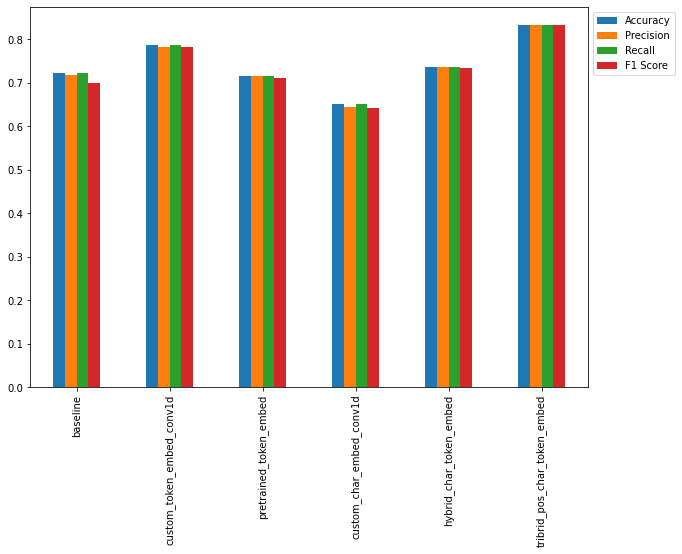

In [132]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

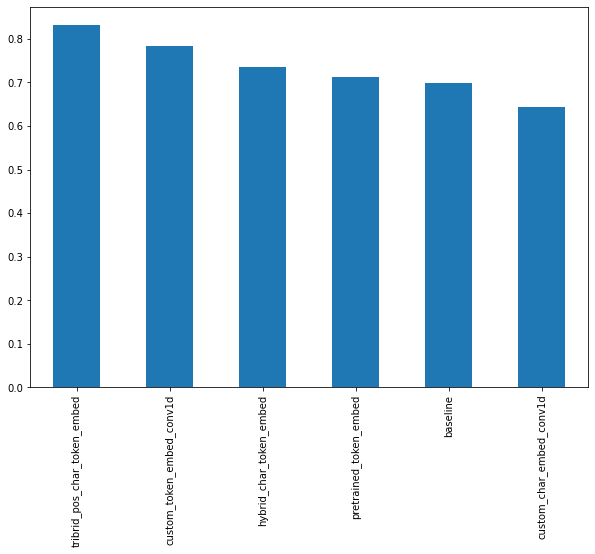

In [135]:
all_model_results.sort_values("F1 Score", ascending=False)["F1 Score"].plot(kind="bar", figsize=(10, 7));